# Map Transformations Scratch

In [7]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [ ]:
fname = "./data/vector/custom_coastline.npy"
coords = np.load(fname)

<IPython.core.display.Javascript object>


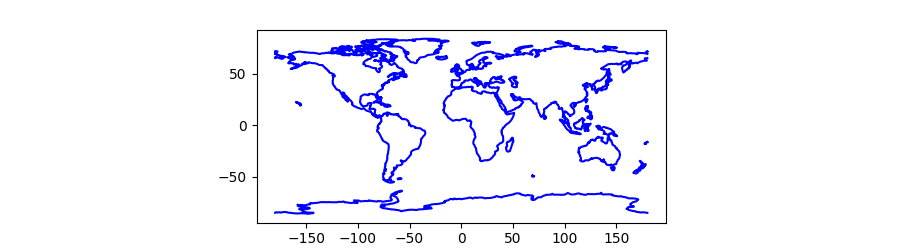

In [15]:
fig = plt.figure(figsize=(9,2.5))
ax = fig.add_subplot(111)

ax.plot(coords[:,0],coords[:,1],"b")
ax.set_aspect("equal")
plt.show()

In [20]:
np.mod([np.nan, 10, 20],[7])

array([nan,  3.,  6.])

In [22]:
coords2

array([[83.80211511,         nan],
       [83.9670146 ,         nan],
       [83.21114343,         nan],
       ...,
       [45.477     ,         nan],
       [43.0993    ,         nan],
       [43.23621   ,         nan]])

In [54]:
def calc_line_breaks(points, dmax=30):
    # where the line rolls over the break in x coord or y coord
    points2 = np.roll(points, 1, 0)
    points2[0, :] = points[0,:]
    d = np.abs(points2 - points)
    
    return np.argwhere(np.logical_or(d[:,0] > dmax, d[:,1] > dmax)).reshape(-1)

def plot_line_map(points, breaks=None, ax=None, color="k"):
    if ax is None:
        _, ax = plt.subplots()
        ax.set_aspect("equal")
        
    if breaks is None:
        ax.plot(points[:,0], points[:,1], color=color)
    else:
        last_br = 0
        for br in breaks:
            ax.plot(points[last_br:br, 0], points[last_br:br, 1], color=color)
            last_br = br
            
        ax.plot(points[last_br:, 0], points[last_br:, 1], color=color)
        
    plt.show()
    
    return ax

<IPython.core.display.Javascript object>


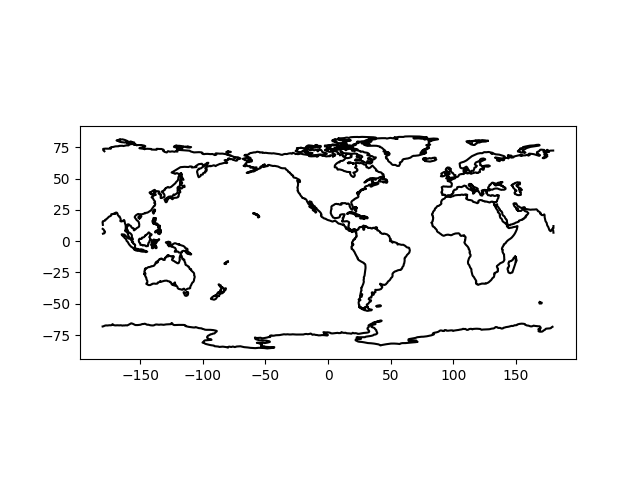

In [56]:
dlon = -100

coords2 = coords + np.array([[-dlon, 0]]) + np.array([[180, 90]])
coords2 = np.mod(coords2, np.array([[360, 180]]))
coords2 = coords2 - np.array([[180, 90]])

breaks2 = calc_line_breaks(coords2)

ax = plot_line_map(coords2, breaks2)